In [182]:
import numpy as np
import pandas as pd
import sympy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

# function used to fit complexity curve
from scipy.optimize import curve_fit

# function used to calculate minimum of RSS 
from sklearn.linear_model import LinearRegression

### Methods

#### Algorithms

In [ ]:
# global parameters

# algoritms 

# plots 

# approximation
lower_cut = 1 # starting point of aproximation 


In [259]:
def gradient_descent(x0, func_sp, learning_rate=0.01, max_iter=100, tol=1e-6):
    # local variables
    history = [x0]
    symbols = list(func_sp.free_symbols)
    x = np.array(x0)

    # calculating grad
    grad = [sp.diff(func_sp, var) for var in symbols]
    # lambdify gradient 
    grad = sp.lambdify(symbols, grad)

    # iterating 
    for _ in range(max_iter):
        next_x = x - learning_rate * np.array(grad(*x.tolist()))
        # checking condition
        if tol and np.linalg.norm(next_x - x) < tol:
            break
        # updating variables
        history.append(next_x)
        x = next_x
    return np.array(history)

In [ ]:
def stochatic_gradient_descent(x0, func_sp, learning_rate=0.01, max_iter=100, tol=1e-6):
    # local variables
    history = [x0]
    symbols = list(func_sp.free_symbols)
    x = np.array(x0)

    # calculating grad
    grad = [sp.diff(func_sp, var) for var in symbols]

    # iterating 
    for _ in range(max_iter):
        # chosing f_it
        f_it = np.random.choice(grad)
        f_it = sp.lambdify(symbols, f_it)
        # calculating next point
        next_x = x - learning_rate * np.array(f_it(*x.tolist()))
        # checking condition
        if tol and np.linalg.norm(next_x - x) < tol:
            break
        # updating variables
        history.append(next_x)
        x = next_x
    return np.array(history)

In [ ]:
def momentum_gradient_descent(x0, beta, func_sp, learning_rate=0.01, max_iter=100, tol=1e-6):
    # local variables
    history = [x0]
    symbols = list(func_sp.free_symbols) 
    x = np.array(x0)
    m = 0
    
    # calculating grad
    grad = [sp.diff(func_sp, var) for var in symbols]
    # lambdify gradient 
    grad = sp.lambdify(symbols, grad)
    
    # iterating  
    for _ in range(max_iter):
        # finding momentum
        next_m = beta * m + np.array(grad(*x.tolist()))
        # calculating new point
        next_x = x - learning_rate * next_m 
        # checking condition
        if tol and np.linalg.norm(next_x - x) < tol:
            break
        # updating variables
        history.append(next_x)
        x = next_x
        m = next_m 
    return np.array(history)

In [ ]:
def adam_gradient_descent(x0, func_sp, learning_rate=0.01, max_iter=100, tol=1e-6, b1=0.9, b2=0.999, epsilon = 1e-8):
    # local variables
    history = [x0]
    symbols = list(func_sp.free_symbols) 
    x = np.array(x0)
    m = 0
    v = 0
    
    # calculating grad
    grad = [sp.diff(func_sp, var) for var in symbols]
    # lambdify gradient 
    grad = sp.lambdify(symbols, grad)
    
    # iterating  
    for t in range(1, max_iter + 1): # we need to move index by one because we divide by zero
        # finding moments
        next_m = b1 * m + (1 - b1) * np.array(grad(*x.tolist()))
        next_m = next_m / (1 - b1**t)
        next_v = b2 * v + (1- b2) * np.array(grad(*x.tolist()))**2
        next_v = next_v / (1  -b2**t)
        # calculating new point 
        next_x = x - learning_rate * next_m / (np.sqrt(next_v) + epsilon)
        # checking condition
        if tol and np.linalg.norm(next_x - x) < tol:
            break
        # updating variables
        history.append(next_x)
        x = next_x
        m = next_m
        v = next_v
    return np.array(history)

#### Plots

In [ ]:

def plot_3d(func: callable, func_g: list, interval: list, min_point: list, func_name: str):
    # local variables
    a, b = interval
    dens = int(np.ceil(b - a) * 10)
    # initiating 
    fig ,ax = plt.subplots(subplot_kw={'projection': '3d'})
    arg_range = np.linspace(a, b, dens)
    xx, yy = np.meshgrid(arg_range, arg_range)
    z = func(xx, yy)

    # plotting 
    ax.plot_surface(xx, yy, z, cmap='viridis', alpha=0.7)

    # gradient trajectory 
    ax.scatter(func_g[:, 0], func_g[:, 1], func(func_g[:, 0], func_g[:, 1]), color='red')
    ax.scatter(*min_point, color='purple')

    # arrows indicating move 
    for i in range(len(func_g) - 1):
        # values 
        x, y, x_n, y_n = *func_g[i, :], *func_g[i + 1, :]
        ax.quiver(x, y, func(x, y),
                x_n - x, y_n - y, func(x_n, y_n) - func(x, y), 
                color='red', arrow_length_ratio=0.1, alpha=0.7)

    # description 
    ax.set_title(f"Gradient Descent on {func_name}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    plt.show()

In [318]:
def plot_3d_on_2d(func: callable, func_g: list, interval: list, lvl: float, min_point: list, func_name: str):
    # creating local variables 
    a, b = interval
    dens = int(np.ceil(b-a) * 10)
    # initiating 
    arg_range = np.linspace(a, b, dens)
    xx, yy = np.meshgrid(arg_range, arg_range)
    z = func(xx, yy)

    # level set 
    z_max, z_min = z.max(), z.min()
    levels = int(np.ceil(z_max - z_min) * lvl)
    contour = plt.contour(xx, yy, z, levels=levels, cmap='viridis')
    plt.clabel(contour, inline=True, fontsize=8)

    # gradient trajectories 
    plt.scatter(func_g[:, 0], func_g[:, 1], color='red', label='Gradient Path')
    plt.scatter(*min_point, color='purple')
    # gradient arrows 
    for i in range(len(func_g) - 1):
        x, y, x_n, y_n = *func_g[i, :], *func_g[i+1, :]
        plt.quiver(x, y, 
                x_n - x, y_n - y,
                angles='xy', scale_units='xy', scale=1.1, color='red', alpha=0.9)

    # display 
    # plt.colorbar(contour)
    plt.title(f"Gradient Descent on ${func_name}$ (Contour Plot)")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

In [ ]:
def plot_complexity(dist: list, func_t: callable, func_t_param: list, complexity: str, m: str = 'png'):
    """
    Funkcja rysująca porównanie zbieżności metody gradientu z teoretyczną złożonością.

    Parametry:
    - dist (list): Lista odległości w każdej iteracji.
    - func_t (callable): Teoretyczna funkcja zbieżności.
    - func_t_param (list): Lista symboli funkcji (parametry).
    - complexity (str): Opis teoretycznej złożoności.
    - m (str): Format zapisu wykresu (np. 'png', 'jpg', 'svg').
    """
    # Local variables
    n = len(dist)
    x = sp.Symbol('x')

    # domains
    dom_dis = [i for i in range(n)]
    dom_con = np.linspace(1, n, (n-1) * 10)

    # lambify functnio
    func_t_lamb = sp.lambdify((x, *func_t_param), func_t)
    # fitting curve to plot
    popt, _ = curve_fit(func_t_lamb, dom_dis[lower_cut:], dist[lower_cut:])
    # creating str for theoritcal function
    func_t_names = {key: format(value, '.2g') 
                    for key, value in zip(func_t_param, popt)}
    func_t_name = sp.latex(func_t.subs(func_t_names))

    # plot
    plt.figure(figsize=(12, 8))
    # real data 
    plt.plot(dom_dis, dist, label='Rzeczywista odległość vs iteracja', 
             color='blue', marker='o', linestyle='-', linewidth=2)
    # fitted function 
    plt.plot(dom_con, func_t_lamb(dom_con, *popt), 
             label=f'${func_t_name}$\nTeoretyczna złożoność: {complexity}', 
             color='red', linestyle='--', linewidth=2)

    # plot setting 
    plt.title(f'Porównanie rzeczywistej zbieżności z teoretyczną złożonością\nZłożoność: {complexity}', fontsize=16)
    plt.xlabel('Iteracja', fontsize=14)
    plt.ylabel('Odległość', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='best', fontsize=12)

    # plot save 
    # plt.savefig(f'plot_complexity.{m}', format=m, dpi=300)
    plt.show()


zaimplementowane w optimize 

### Tests

#### help function

In [ ]:
def complexity_raport(x_init: list, x_final: list, func_sp: sp.Function, 
                      learning_rate: float, n_iter: int, tol,
                      b = 0.9, b1 = 0.9, b2 = 0.999):
    
    # calculating aproximations 
    tf_g_val_gd = gradient_descent(x_init, func_sp, learning_rate, n_iter, tol)
    tf_g_val_sgd = stochatic_gradient_descent(x_init, func_sp, learning_rate, n_iter, tol)
    tf_g_val_mgd = momentum_gradient_descent(x_init, b, func_sp, learning_rate, n_iter, tol)
    tf_g_val_adam = adam_gradient_descent(x_init, func_sp, learning_rate, n_iter, tol, b1, b2)

    # compare them (distance) to known minimum (analitically)
    dist_gd = abs(tf_g_val_gd - x_final)
    dist_gd = np.sqrt(dist_gd[:, 0]**2 + dist_gd[:, 1]**2)
    dist_sgd = abs(tf_g_val_sgd - x_final)
    dist_sgd = np.sqrt(dist_sgd[:, 0]**2 + dist_sgd[:, 1]**2)
    dist_mgd = abs(tf_g_val_mgd - x_final)
    dist_mgd = np.sqrt(dist_mgd[:, 0]**2 + dist_mgd[:, 1]**2)
    dist_adam = abs(tf_g_val_adam - x_final)
    dist_adam = np.sqrt(dist_adam[:, 0]**2 + dist_adam[:, 1]**2)

    x, a, b = sp.symbols('x, a, b')
    plot_complexity(dist_gd, a/x + b, (a, b), 'complexity $\mathcal{O}(\\frac{1}{t})$')
    plot_complexity(dist_sgd, a/x + b, (a, b), 'complexity $\mathcal{O}(\\frac{1}{t})$')
    plot_complexity(dist_mgd,a/x**2 + b, (a, b), 'Complexity $\mathcal{O}(\\frac{1}{t^2})$')
    plot_complexity(dist_adam,a * sp.log(x) + b, (a, b), 'Complexity $\mathcal{O}(\log(1/t))$')

#### functions

Convergence test for $\mathcal{O}$ with:
- RSS
- Standard function
- check which function they use

RSS

1158.28044870261*(-0.0293827971676208*b_0 - 0.279629021242844*b_1 + 1)**2 + 23936.7430422396*(-0.00646349580297238*b_0 - 0.451523781477707*b_1 + 1)**2 + 26889.7257924583*(-0.00609827230922389*b_0 - 0.454262957680821*b_1 + 1)**2
[[ 1.         74.4904351 ]
 [ 1.          9.51675974]
 [ 1.         69.8575191 ]] [[163.9808702 ]
 [ 34.03351949]
 [154.71503819]]


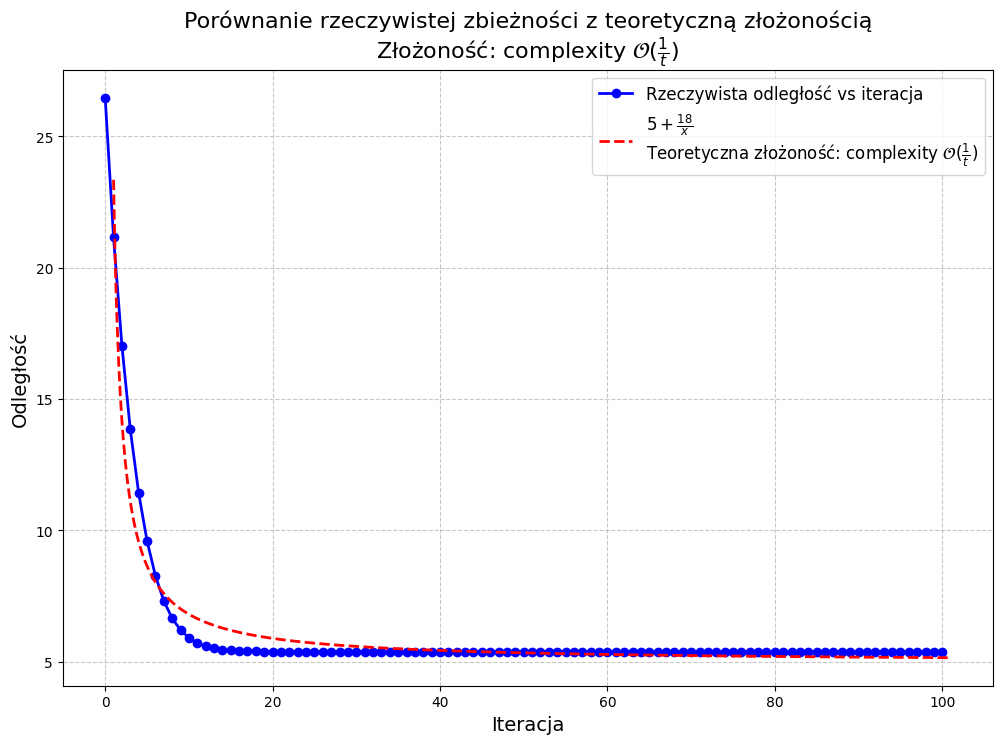

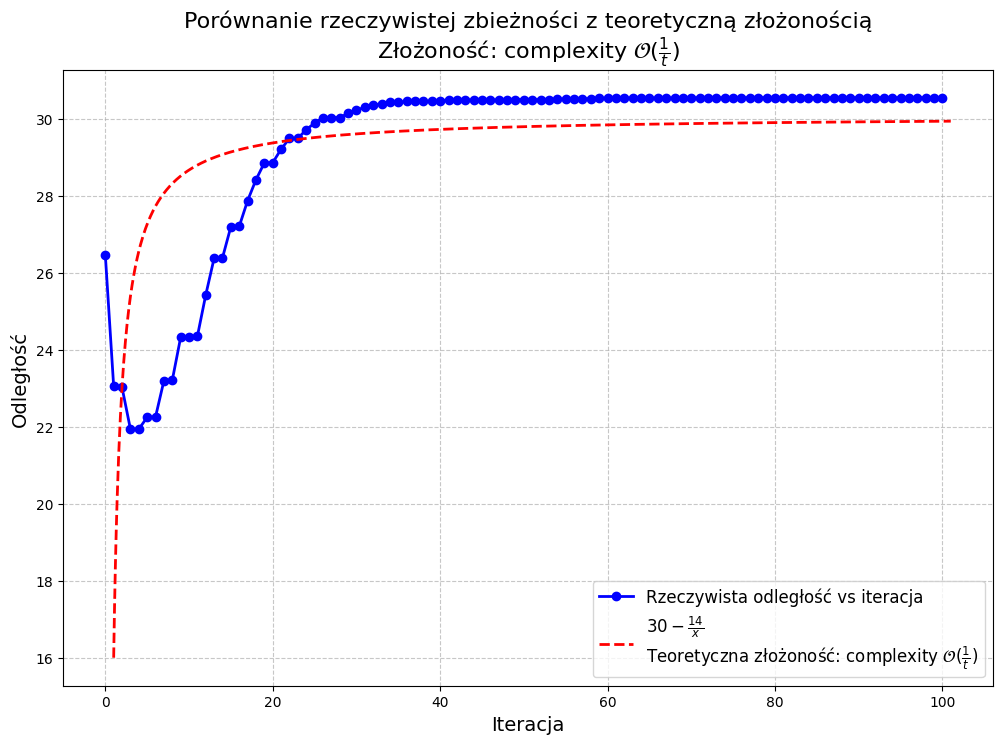

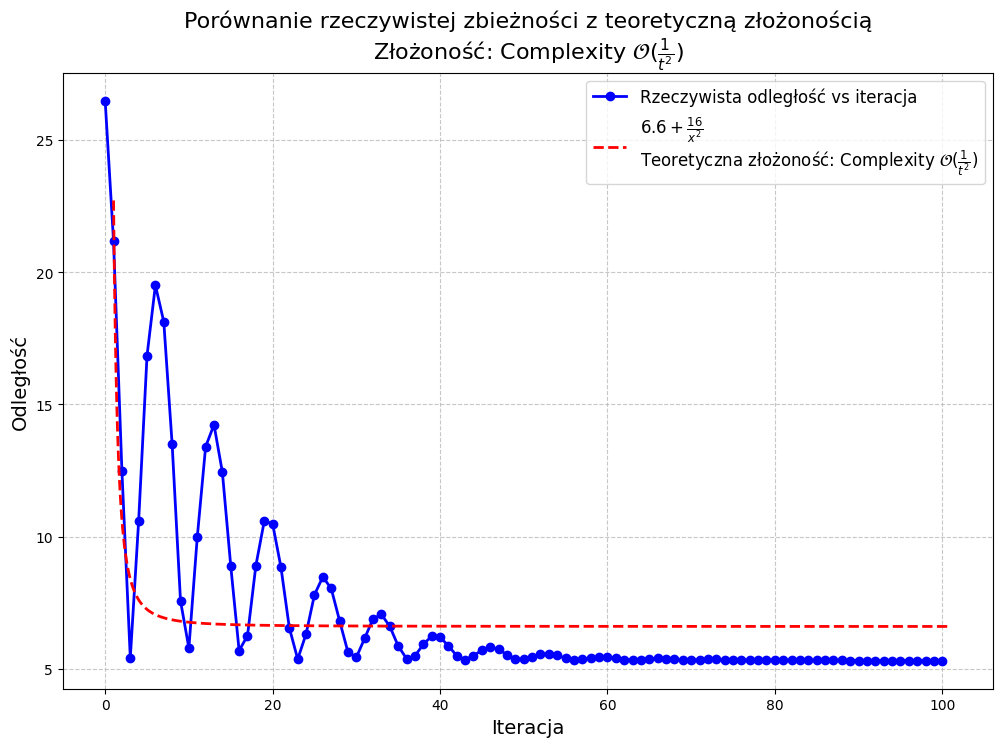

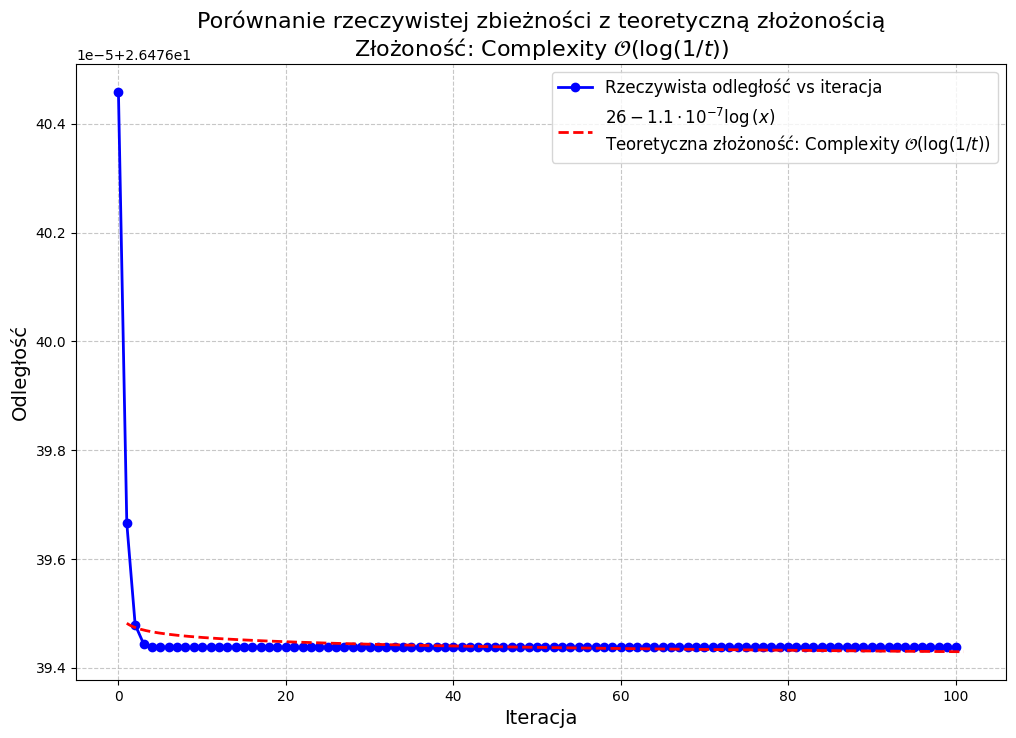

In [274]:
# function parameters
n = 3 # lenght of probe 
m = 2 # feature amount 
bi = sp.symbols(f'b_0:{m}') # estimated values
  
# algorithms parameters 
x0 = (10, 28)
lr = 0.00001
n_iter = 100


# creating probe 
X = np.random.uniform(0, 100, n).reshape(-1 ,1)
y = X * 2 + 15
# creating matrix with ones 
X = np.hstack((np.ones(X.shape), X))

# finding x_true
b_true = np.linalg.solve(X.T @ X, X.T @ y).reshape(-1, ) # should be same as coefficent in y

np.array(bi).reshape(-1, 1)
# creating RRS 
RSS = sum((y[i] - X[i, :] @ np.array(bi).reshape(-1, 1))**2 for i in range(n)).item()
print(RSS)

print(X, y)

# raport
complexity_raport(x0, b_true, RSS, lr, n_iter, None)



# TODO, we can add noise later
# TODO, random point and take mean of this calculations ???? ~ 

normal function

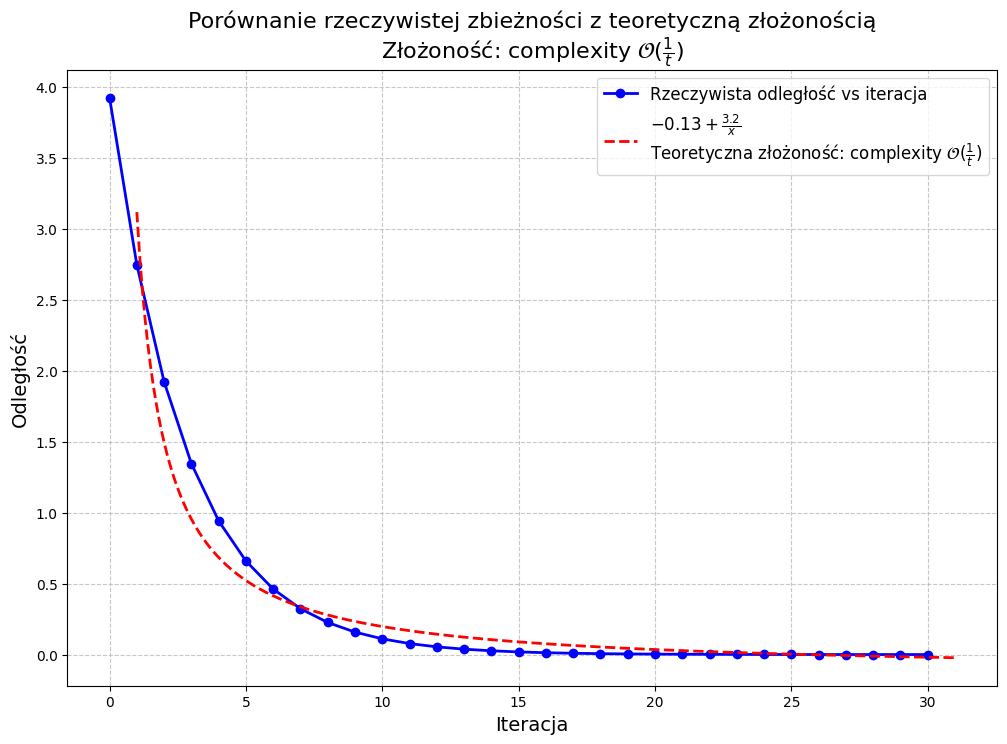

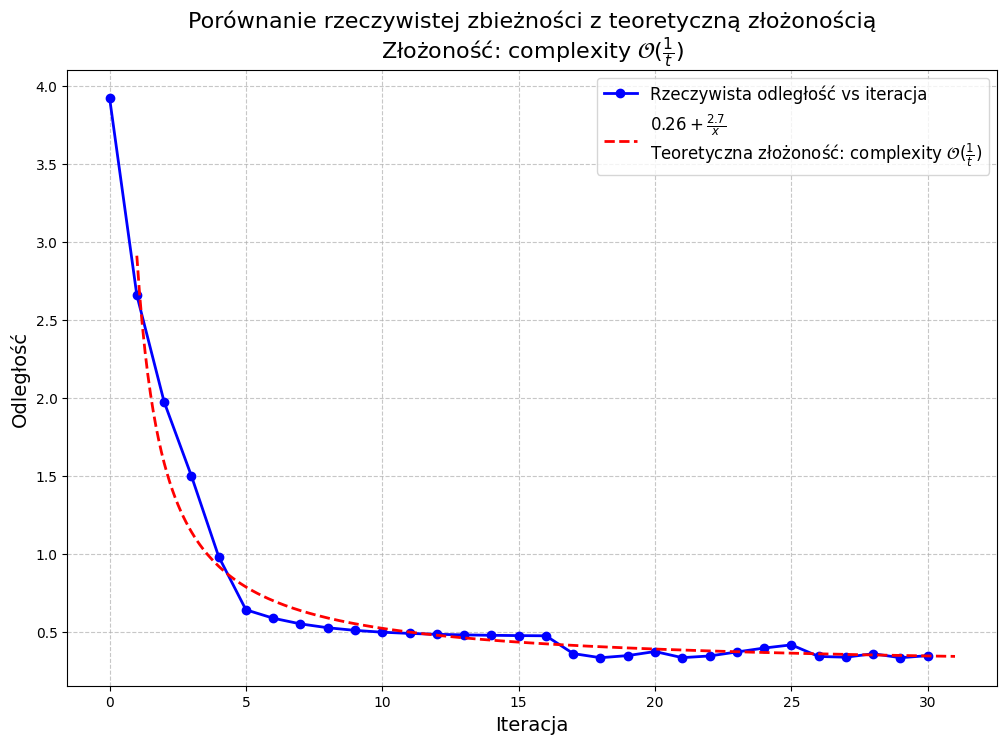

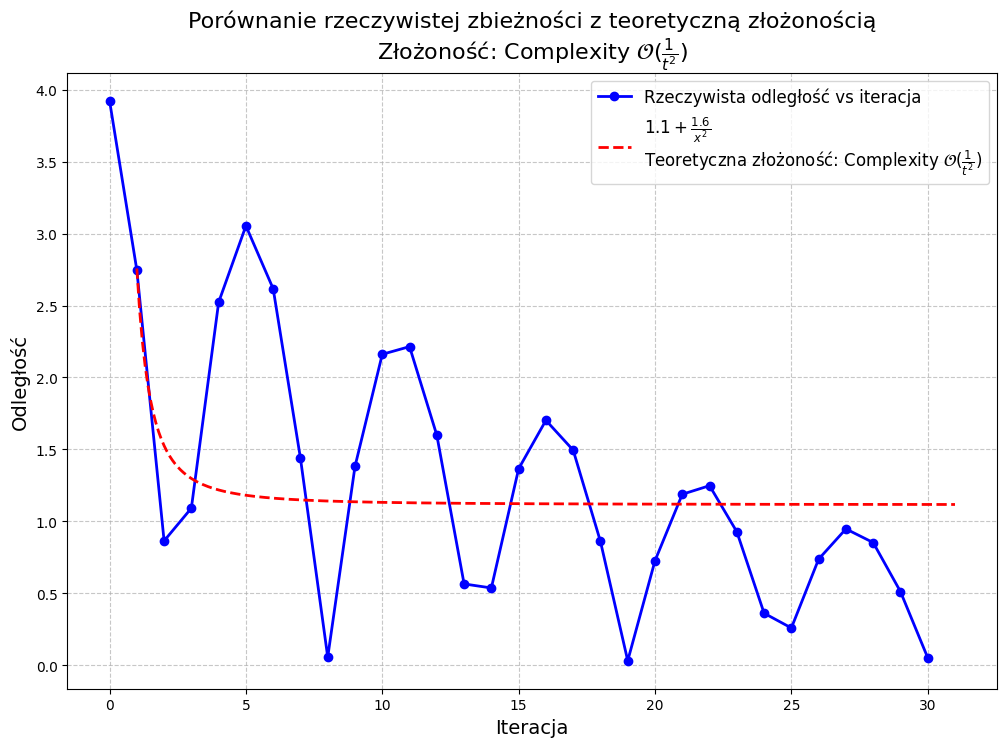

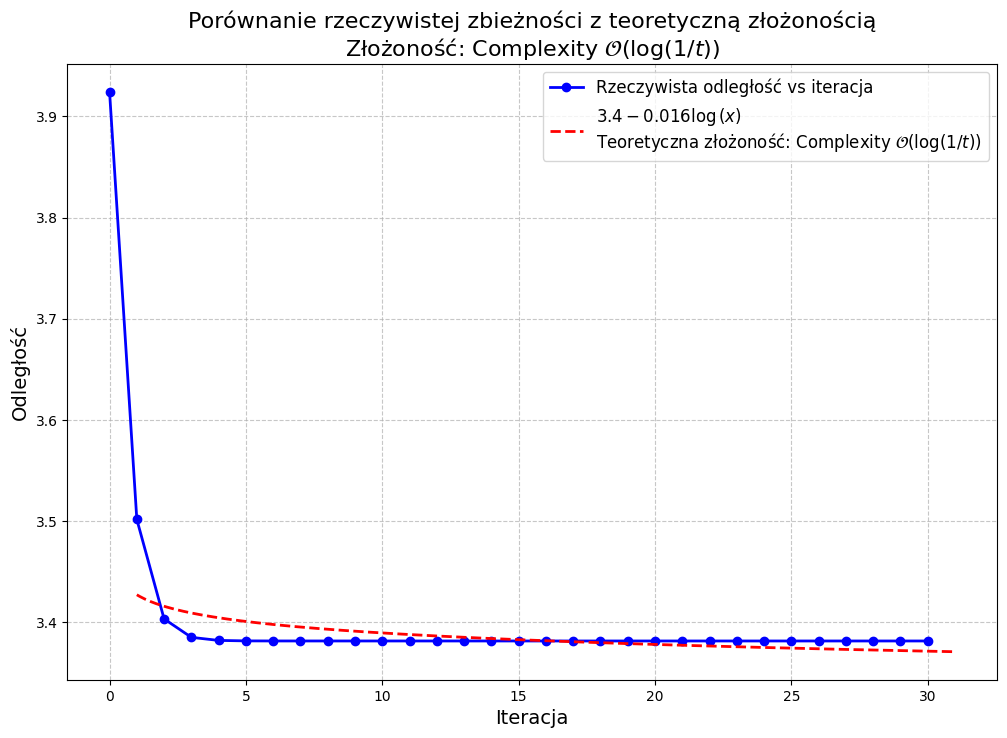

In [275]:
# parameters
learning_rate = 0.3
n_iter = 30
x_init = (3, 3)
x_final = (0, 0.47)

# creating function
x, y = sp.symbols('x y')
func_sp = 5/10 * (x**2 + (y- 0.47)**2)   
complexity_raport(x_init, x_final, func_sp, learning_rate, n_iter, None)

Presentation tests

Explaining parameters
- slow vs high learning ratio 
- momentum parameters 
- adam parameters

Problems with new methods
- Function with such gradient that we are jumping between minimum point 
- Function with such gradient that we can not enter to it (sparse data, very slow slope need of momentum)
- function that adam is much better than momentum, 

comparison 
- same function with all methods (we can join plots)
    - join plots with abs error 
    - on one plot every iteration step by step, (so we can see what is going on)
      

### Slajdy

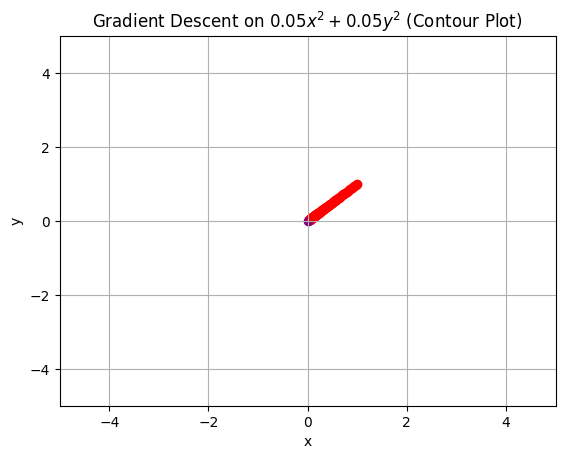

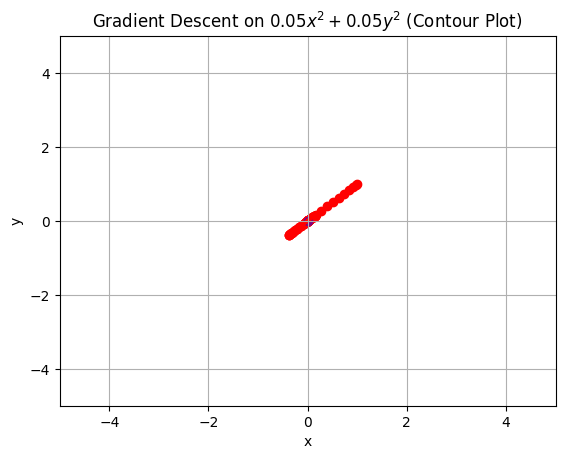

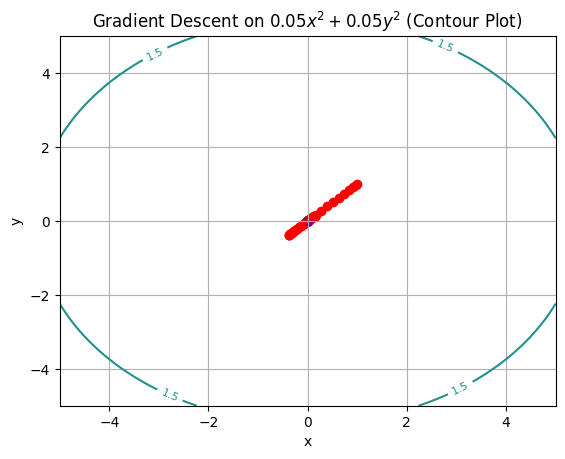

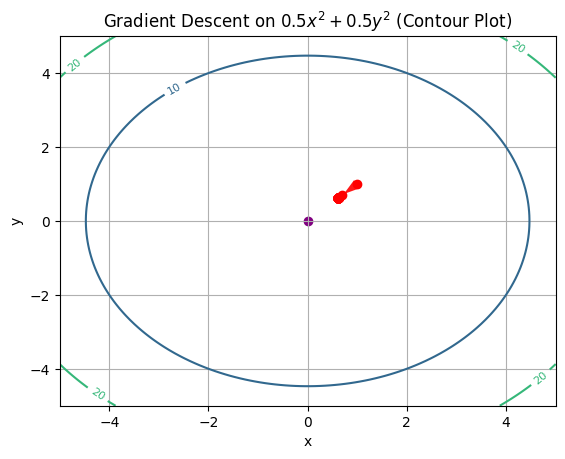

In [380]:
# parameters
learning_rate = 0.3
n_iter = 120
x_init = (1, 1)
x_final = (0, 0)

# creating function
x, y = sp.symbols('x y')


###############################
# # funkcja gd działająca 
# func_sp = 1/100 * (x**2 + (y- 0.47)**2)
# func_name = sp.latex(func_sp)
# func = sp.lambdify((x, y), func_sp)
# func_sp_gd = gradient_descent(x_init, func_sp, learning_rate, n_iter, None)

# plot_3d_on_2d(func, func_sp_gd, [-5, 5], 4, x_final, func_name)


#########################
# # pokazanie Learning rate (skrajne wartości)
# learning_rate = 4
# func_sp = 1/2 * x**2 + y **2 
# func_name = sp.latex(func_sp)
# func = sp.lambdify((x, y), func_sp)
# func_sp_gd = gradient_descent(x_init, func_sp, learning_rate, n_iter, None)

# # TODO loop for n1:4 so we can see how it is jumping ~ showing to big learning value and also lack of momentum

# plot_3d_on_2d(func, func_sp_gd, [-5, 5], 0.1, x_final, func_name)



##############################
# gd nie działa ~ słaba zbieżnośc (nie minima są małe)
func_sp = 1/20 *( x**2 + y **2)
func_name = sp.latex(func_sp)
func = sp.lambdify((x, y), func_sp)
func_sp_gd = gradient_descent(x_init, func_sp, learning_rate, n_iter, None)

plot_3d_on_2d(func, func_sp_gd, [-5, 5], 0.1, x_final, func_name)


# pokazanie że momentum sobie lepiej radzi 
func_sp = 1/20 *(x**2 + y **2)
func_name = sp.latex(func_sp)
func = sp.lambdify((x, y), func_sp)
func_sp_gd = momentum_gradient_descent(x_init, 0.9, func_sp, learning_rate, n_iter, None)

plot_3d_on_2d(func, func_sp_gd, [-5, 5], 0.1, x_final, func_name)



##############################
# pokazanie że momentum sobie lepiej radzi 
func_sp = 1/20 *(x**2 + y **2)
func_name = sp.latex(func_sp)
func = sp.lambdify((x, y), func_sp)
func_sp_gd = momentum_gradient_descent(x_init, 0.9, func_sp, learning_rate, n_iter, None)

plot_3d_on_2d(func, func_sp_gd, [-5, 5], 0.4, x_final, func_name)

# komentarz nie trzeba osobno bety rozpatrywać, wystarczy po prostu skomentować to to nam mówi o tym w jaki sposób

# n = 10
func_sp = 10/20 *(x**2 + y **2)
func_name = sp.latex(func_sp)
func = sp.lambdify((x, y), func_sp)
func_sp_gd = adam_gradient_descent(x_init, func_sp, learning_rate, n_iter, None)

plot_3d_on_2d(func, func_sp_gd, [-5, 5], 0.1, x_final, func_name)

### Working Test 

In [ ]:
# parameters
learning_rate = 0.3
n_iter = 30
x_init = (3, 3)
x_final = (0, 0.47)

# creating function
x, y = sp.symbols('x y')
func_sp = 5/10 * (x**2 + (y- 0.47)**2)   
complexity_raport(x_init, x_final, func_sp, learning_rate, n_iter, None)